In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')


In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
df.duplicated().sum()

0

In [6]:
num = ['CreditScore','Age','Balance','Tenure','NumOfProducts','HasCrCard','IsActiveMember',
'EstimatedSalary','Exited']
cate = ['Surname','Gender','Geography']

In [7]:
df.drop(['id','CustomerId'],axis =1, inplace =True)

DATA VISUALIZATION

Text(0.5, 1.0, 'Churn Customer Prediction visualization')

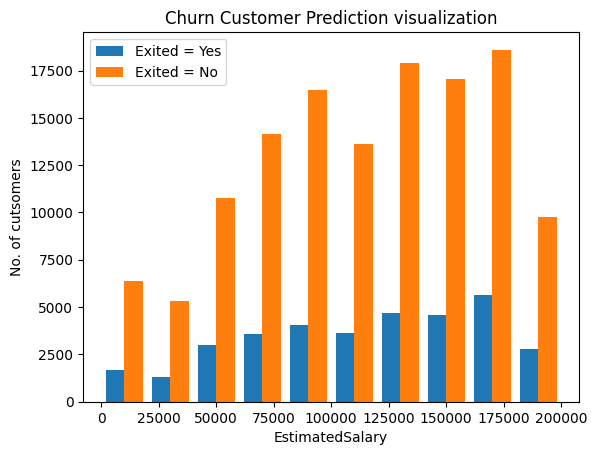

In [8]:
tenure_churn0 = df[df.Exited==0].EstimatedSalary
tenure_churn1 = df[df.Exited==1].EstimatedSalary

plt.hist([tenure_churn1,tenure_churn0],label=["Exited = Yes","Exited = No"])
plt.legend()
plt.ylabel("No. of cutsomers")
plt.xlabel("EstimatedSalary")
plt.title("Churn Customer Prediction visualization")

Text(0.5, 1.0, 'Churn Customer Prediction visualization')

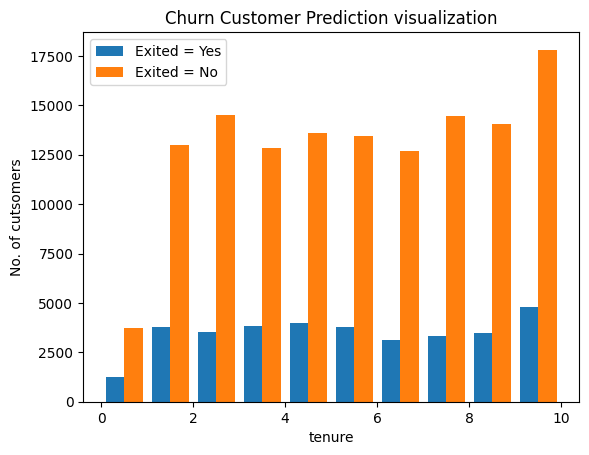

In [9]:
tenure_churn0 = df[df.Exited==0].Tenure
tenure_churn1 = df[df.Exited==1].Tenure

plt.hist([tenure_churn1,tenure_churn0],label=["Exited = Yes","Exited = No"])
plt.legend()
plt.ylabel("No. of cutsomers")
plt.xlabel("tenure")
plt.title("Churn Customer Prediction visualization")

In [10]:
for column in df:
    if df[column].dtypes == 'object':
        print(f'{column} : {df[column].unique()}')

Surname : ['Okwudilichukwu' 'Okwudiliolisa' 'Hsueh' ... 'Aliyev' 'McMinn' 'Elkins']
Geography : ['France' 'Spain' 'Germany']
Gender : ['Male' 'Female']


In [11]:
df.skew(numeric_only=True)

CreditScore       -0.059291
Age                0.968063
Tenure             0.006490
Balance            0.382020
NumOfProducts      0.368278
HasCrCard         -1.179255
IsActiveMember     0.008920
EstimatedSalary   -0.309022
Exited             1.412215
dtype: float64

In [12]:
df.corr(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.008918,0.000942,0.006973,0.011361,-0.002828,0.014790,-0.001820,-0.027383
Age,-0.008918,1.000000,-0.010830,0.064318,-0.102195,-0.012111,0.003320,-0.005399,0.340768
Tenure,0.000942,-0.010830,1.000000,-0.009481,0.007335,0.005327,-0.005532,0.000971,-0.019565
Balance,0.006973,0.064318,-0.009481,1.000000,-0.361033,-0.018584,-0.015073,0.008586,0.129743
NumOfProducts,0.011361,-0.102195,0.007335,-0.361033,1.000000,0.005482,0.039736,-0.004285,-0.214554
HasCrCard,-0.002828,-0.012111,0.005327,-0.018584,0.005482,1.000000,-0.021034,0.004438,-0.022141
IsActiveMember,0.014790,0.003320,-0.005532,-0.015073,0.039736,-0.021034,1.000000,-0.008080,-0.210237
EstimatedSalary,-0.001820,-0.005399,0.000971,0.008586,-0.004285,0.004438,-0.008080,1.000000,0.018827
Exited,-0.027383,0.340768,-0.019565,0.129743,-0.214554,-0.022141,-0.210237,0.018827,1.000000


array([[<Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>],
       [<Axes: title={'center': 'IsActiveMember'}>,
        <Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>]], dtype=object)

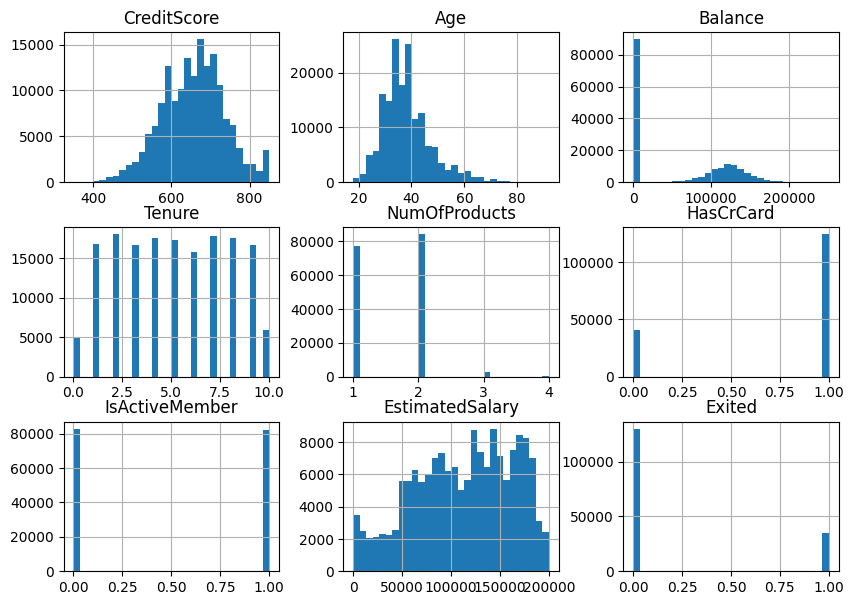

In [13]:
df[num].hist(bins=30,figsize = (10,7))

array([<Axes: title={'center': 'CreditScore'}>,
       <Axes: title={'center': 'Age'}>,
       <Axes: title={'center': 'Balance'}>,
       <Axes: title={'center': 'Tenure'}>,
       <Axes: title={'center': 'NumOfProducts'}>,
       <Axes: title={'center': 'HasCrCard'}>,
       <Axes: title={'center': 'IsActiveMember'}>,
       <Axes: title={'center': 'EstimatedSalary'}>,
       <Axes: title={'center': 'Exited'}>], dtype=object)

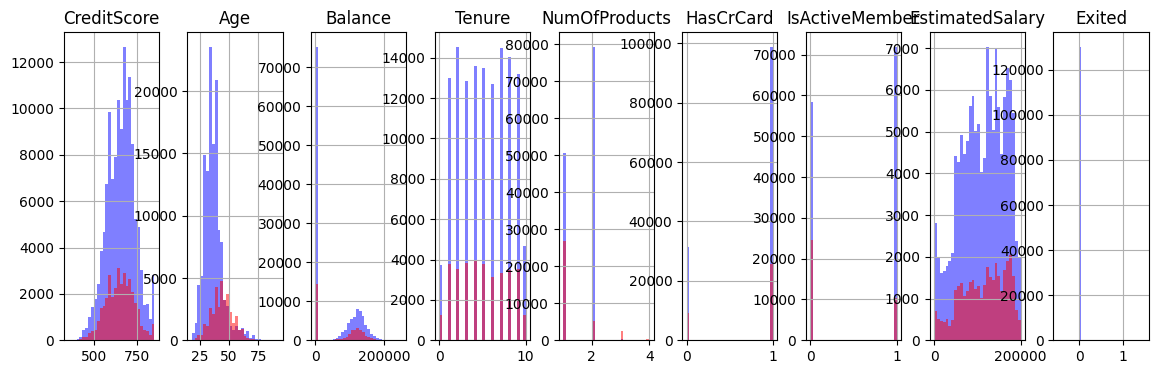

In [14]:
# fig,ax = plt.subplots(1,9,figsize=(14,4))
# df[df.Exited == 0][num].hist(bins=30,color = "blue",alpha = 0.5,ax=ax)
# df[df.Exited == 1][num].hist(bins=30,color = "red",alpha = 0.5,ax=ax)

In [15]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [16]:
df.shape

(165034, 12)

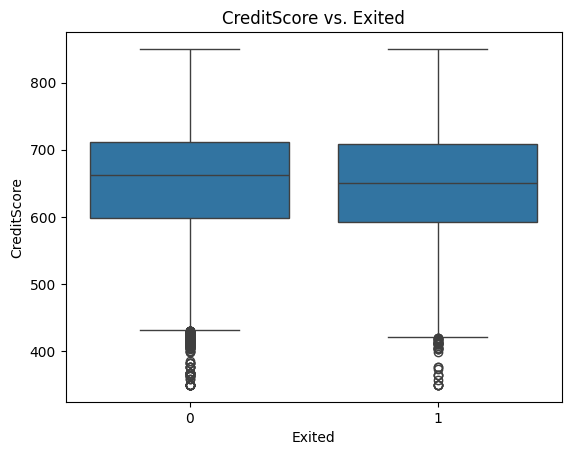

In [17]:
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title('CreditScore vs. Exited')
plt.xlabel('Exited')
plt.ylabel('CreditScore')
plt.show()

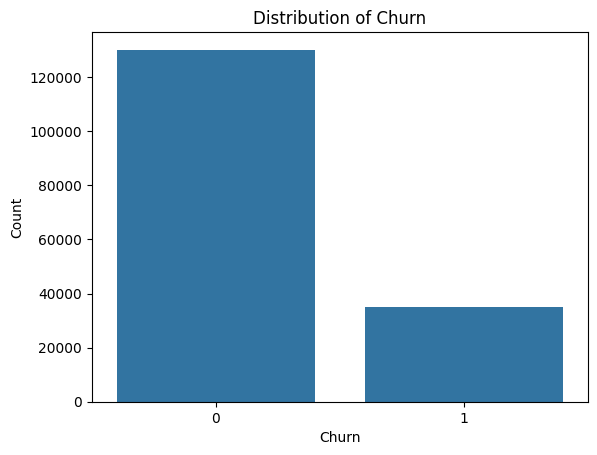

In [18]:
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Surname          165034 non-null  object 
 1   CreditScore      165034 non-null  int64  
 2   Geography        165034 non-null  object 
 3   Gender           165034 non-null  object 
 4   Age              165034 non-null  float64
 5   Tenure           165034 non-null  int64  
 6   Balance          165034 non-null  float64
 7   NumOfProducts    165034 non-null  int64  
 8   HasCrCard        165034 non-null  float64
 9   IsActiveMember   165034 non-null  float64
 10  EstimatedSalary  165034 non-null  float64
 11  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 15.1+ MB


In [20]:
# df.duplicated().sum()

In [21]:
df['Exited'].value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [22]:
df['Geography'].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [23]:
df['Gender'].value_counts()

Gender
Male      93150
Female    71884
Name: count, dtype: int64

In [24]:
df.drop('Surname',axis=1,inplace = True)

In [25]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [26]:
df = pd.get_dummies(df,columns = ['Geography','Gender'],drop_first=True,dtype=int)

In [27]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,668,33.0,3,0.00,2,1.0,0.0,181449.97,0,0,0,1
1,627,33.0,1,0.00,2,1.0,1.0,49503.50,0,0,0,1
2,678,40.0,10,0.00,2,1.0,0.0,184866.69,0,0,0,1
3,581,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0,0,1
4,716,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,1,1


Scaling of values


In [28]:
y = df['Exited']
X = df.drop('Exited',axis = 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=1)

In [30]:
X_train.shape

(132027, 11)

In [31]:
def getFeats(df): 
#     df["Surname_First_Letter"] = df["Surname"].apply(lambda x: x[0]) 
    df["Age_NumOfProducts"] = df["Age"] ** df["NumOfProducts"] 
    df['IsSenior'] = df['Age'].apply(lambda x: 1 if x >= 60 else 0) 
    df['IsActive_by_CreditCard'] = df['HasCrCard'] * df['IsActiveMember'] 
    df['Products_Per_Tenure'] = df['Tenure'] / df['NumOfProducts'] 
    df['AgeCat'] = np.round(df.Age/20).astype('int').astype('category') 
    df['AvgBalancePerProduct'] = df['Balance'] / df['NumOfProducts'] 
    df['TenureToAgeRatio'] = df['Tenure'] / df['Age'] 
    df['Balance_to_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary'] 
    df['CreditScoreTier'] = pd.cut(df['CreditScore'], bins=[0, 650, 750, 850], labels=['Low', 'Medium', 'High']) 
    return df

In [32]:
X_train1 = getFeats(X_train)
X_test1 = getFeats(X_test)

In [33]:
X_train1= pd.get_dummies(X_train1,columns =['CreditScoreTier'],drop_first=True,dtype=int)
X_test1= pd.get_dummies(X_test1,columns =['CreditScoreTier'],drop_first=True,dtype=int)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

X_train_scaled = scaler.fit_transform(X_train1)
X_test_scaled = scaler.fit_transform(X_test1)

In [35]:
X_train1.shape

(132027, 21)

construct model

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization

In [37]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_dim = 21))
BatchNormalization()

model.add(Dense(32,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
  

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 4033 (15.75 KB)
Trainable params: 4033 (15.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
model.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [40]:
model.fit(X_train_scaled,y_train,epochs = 100,verbose =2)

Epoch 1/100
4126/4126 - 10s - loss: 0.3418 - accuracy: 0.8560 - 10s/epoch - 2ms/step
Epoch 2/100
4126/4126 - 9s - loss: 0.3262 - accuracy: 0.8634 - 9s/epoch - 2ms/step
Epoch 3/100
4126/4126 - 8s - loss: 0.3242 - accuracy: 0.8639 - 8s/epoch - 2ms/step
Epoch 4/100
4126/4126 - 8s - loss: 0.3231 - accuracy: 0.8650 - 8s/epoch - 2ms/step
Epoch 5/100
4126/4126 - 9s - loss: 0.3226 - accuracy: 0.8650 - 9s/epoch - 2ms/step
Epoch 6/100
4126/4126 - 8s - loss: 0.3221 - accuracy: 0.8648 - 8s/epoch - 2ms/step
Epoch 7/100
4126/4126 - 8s - loss: 0.3213 - accuracy: 0.8651 - 8s/epoch - 2ms/step
Epoch 8/100
4126/4126 - 9s - loss: 0.3210 - accuracy: 0.8652 - 9s/epoch - 2ms/step
Epoch 9/100
4126/4126 - 8s - loss: 0.3205 - accuracy: 0.8658 - 8s/epoch - 2ms/step
Epoch 10/100
4126/4126 - 8s - loss: 0.3202 - accuracy: 0.8656 - 8s/epoch - 2ms/step
Epoch 11/100
4126/4126 - 8s - loss: 0.3199 - accuracy: 0.8660 - 8s/epoch - 2ms/step
Epoch 12/100
4126/4126 - 8s - loss: 0.3195 - accuracy: 0.8659 - 8s/epoch - 2ms/step

Epoch 99/100
4126/4126 - 8s - loss: 0.3041 - accuracy: 0.8721 - 8s/epoch - 2ms/step
Epoch 100/100
4126/4126 - 8s - loss: 0.3044 - accuracy: 0.8723 - 8s/epoch - 2ms/step


In [41]:
y_pred = model.predict(X_test_scaled)

1032/1032 [==============================] - 2s 2ms/step


In [42]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt

fpr, tpr,thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr,tpr)

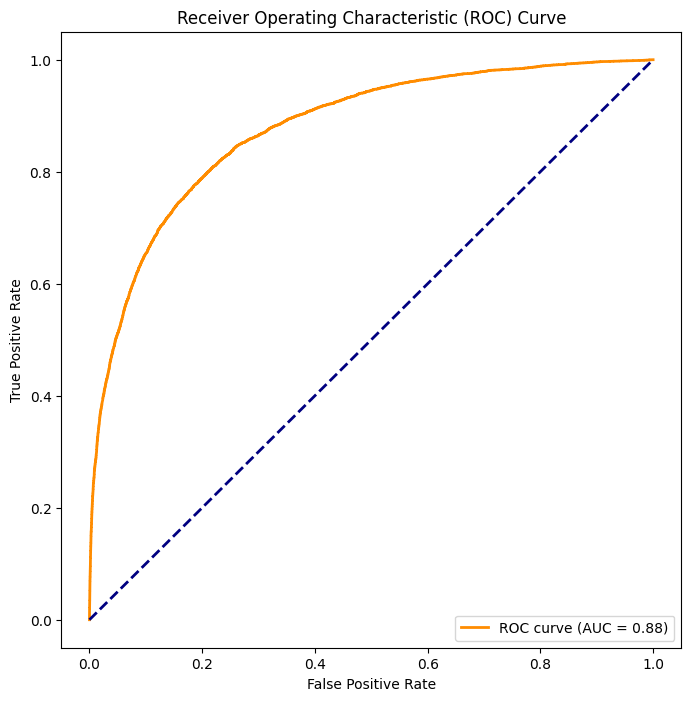

In [43]:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
roc_auc

0.8765380363253545

In [42]:
df_test = pd.read_csv('test.csv')

In [43]:
# df_test_scaled = scaler.fit_transform(df_test)
df_test.drop(['id','CustomerId','Surname'],axis =1,inplace =True)

In [44]:
df_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [45]:
dff_test = pd.get_dummies(df_test,columns = ['Geography','Gender'],drop_first=True,dtype=int)

In [46]:
dff_test_scaled = scaler.fit_transform(dff_test)

In [47]:
answer = model.predict(dff_test_scaled)

3439/3439 [==============================] - 6s 2ms/step


In [48]:
# ans = np.where(answer > 0.3106806,1,0)
rounded_array = np.around(answer, decimals=1)
rounded_array
# answer

array([[0. ],
       [0.8],
       [0. ],
       ...,
       [0. ],
       [0.2],
       [0.3]], dtype=float32)

In [49]:
sub = pd.read_csv('sample_submission.csv')

In [50]:
final_array = rounded_array.ravel()

In [51]:
final = pd.DataFrame({"id":sub["id"],
                    "Exited":final_array})

In [52]:
final.to_csv("submission.csv",index=False)

# USING MIN MAX

In [53]:
from sklearn.preprocessing import MinMaxScaler
mx = MinMaxScaler()

X_train_mx = mx.fit_transform(X_train)
X_test_mx = mx.fit_transform(X_test)

In [54]:
model1 = Sequential()
model1.add(Dense(11,activation = 'relu',input_dim = 11))
model1.add(Dense(5,activation = 'relu'))
model1.add(Dense(5,activation = 'relu'))
# model1.add(Dense(4,activation = 'relu'))
model1.add(Dense(1,activation = 'sigmoid'))

In [55]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 11)                132       
                                                                 
 dense_5 (Dense)             (None, 5)                 60        
                                                                 
 dense_6 (Dense)             (None, 5)                 30        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 228 (912.00 Byte)
Trainable params: 228 (912.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [56]:
model1.compile(loss='binary_crossentropy',optimizer = 'Adam',metrics=['accuracy'])

In [ ]:
model1.fit(X_train_mx,y_train,epochs = 150,verbose =2)

Epoch 1/150
4126/4126 - 10s - loss: 0.4084 - accuracy: 0.8274 - 10s/epoch - 2ms/step
Epoch 2/150
4126/4126 - 8s - loss: 0.3492 - accuracy: 0.8517 - 8s/epoch - 2ms/step
Epoch 3/150
4126/4126 - 9s - loss: 0.3378 - accuracy: 0.8572 - 9s/epoch - 2ms/step
Epoch 4/150
4126/4126 - 9s - loss: 0.3341 - accuracy: 0.8590 - 9s/epoch - 2ms/step
Epoch 5/150
4126/4126 - 8s - loss: 0.3322 - accuracy: 0.8603 - 8s/epoch - 2ms/step
Epoch 6/150
4126/4126 - 8s - loss: 0.3312 - accuracy: 0.8611 - 8s/epoch - 2ms/step
Epoch 7/150
4126/4126 - 8s - loss: 0.3302 - accuracy: 0.8616 - 8s/epoch - 2ms/step
Epoch 8/150
4126/4126 - 8s - loss: 0.3294 - accuracy: 0.8624 - 8s/epoch - 2ms/step
Epoch 9/150
4126/4126 - 8s - loss: 0.3289 - accuracy: 0.8621 - 8s/epoch - 2ms/step
Epoch 10/150
4126/4126 - 8s - loss: 0.3284 - accuracy: 0.8628 - 8s/epoch - 2ms/step
Epoch 11/150
4126/4126 - 8s - loss: 0.3283 - accuracy: 0.8630 - 8s/epoch - 2ms/step
Epoch 12/150
4126/4126 - 8s - loss: 0.3279 - accuracy: 0.8633 - 8s/epoch - 2ms/step

In [ ]:
y_pred1 = model1.predict(X_test_mx)

In [ ]:
fpr1, tpr1,thresholds1 = roc_curve(y_test,y_pred1)
roc_auc1 = auc(fpr1,tpr1)

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc1))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
roc_auc1

In [ ]:
dff_test_mx =mx.fit_transform(dff_test)

In [ ]:
answer1 = model1.predict(dff_test_mx)

In [ ]:
rounded_array1 = np.around(answer1, decimals=1)
rounded_array1

In [ ]:
final_array1 = rounded_array1.ravel()
final1 = pd.DataFrame({"id":sub["id"],
                    "Exited":final_array1})

In [ ]:
final1.to_csv("submission1.csv",index=False)